# DSN AI Bootcamp Qualification 2023

## Problem Statement

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, Wazobia Real Estate Limited is seeking the expertise of data scientists like you to develop a robust predictive model.


## Getting environment Ready

### Installing Dependencies and Importing libraries

In [122]:
import pandas as pd                        #for data wrangling and preprocessing
import numpy as np                         #for statistical analysis
import matplotlib.pyplot as plt            #for visualisation
%matplotlib inline
import matplotlib as mpl
import seaborn as sns                      #visualisation
plt.style.use('fivethirtyeight')
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [123]:
train = pd.read_csv("D:/Browser Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_train.csv") 

In [124]:
test = pd.read_csv("D:/Browser Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv")

In [125]:
train.head(50)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1.150000e+06
1,2748,Ondo,Apartment,NaN,2.0,4.0,1.672417e+06
2,9261,Ekiti,NaN,7.0,5.0,NaN,3.364800e+06
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2.410307e+06
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2.600701e+06
5,1733,Borno,Mansion,NaN,1.0,3.0,1.341751e+06
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2.125790e+06
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2.043108e+06
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1.219454e+06
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2.710665e+06


In [126]:
test.head(50)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
5,9950,Edo,Detached duplex,6,4,5
6,1548,Niger,Flat,9,3,4
7,526,Anambra,Flat,1,1,4
8,6776,Niger,Flat,1,5,1
9,1851,Adamawa,Bungalow,4,1,4


In [127]:
train.shape

(14000, 7)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


## Explorative Data Analysis

### Visualizing the Missing Values per each column

<AxesSubplot:>

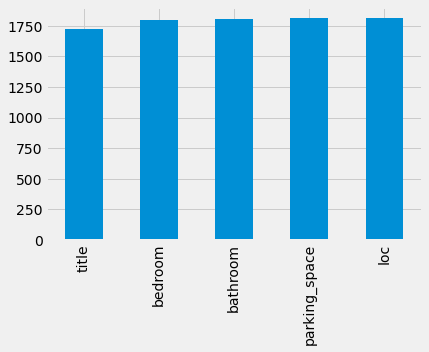

In [129]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## Visualizing the Categorical Features

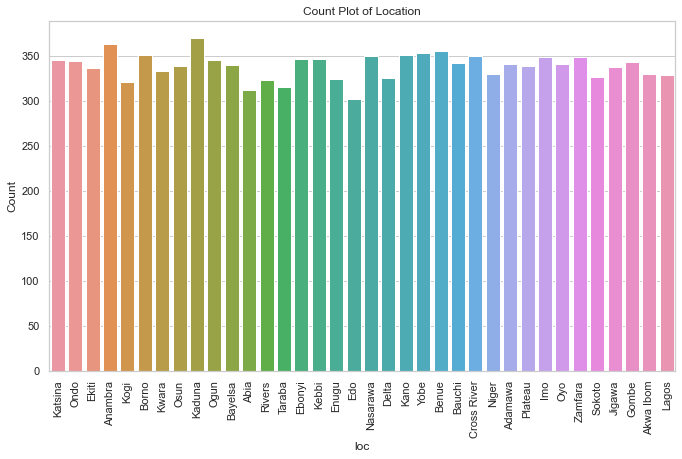

In [130]:
#Count Plot of Loc column

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='loc', data=train)
plt.xticks(rotation=90)
plt.title('Count Plot of Location')
plt.xlabel('loc')
plt.ylabel('Count')
plt.show()

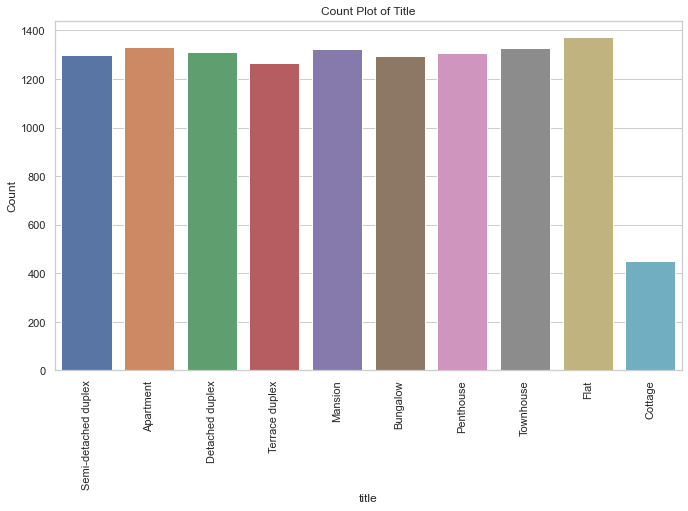

In [131]:
#Count plot of Title

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=train)
plt.xticks(rotation=90)
plt.title('Count Plot of Title')
plt.xlabel('title')
plt.ylabel('Count')
plt.show()

#### Comparing categorical features with the price column

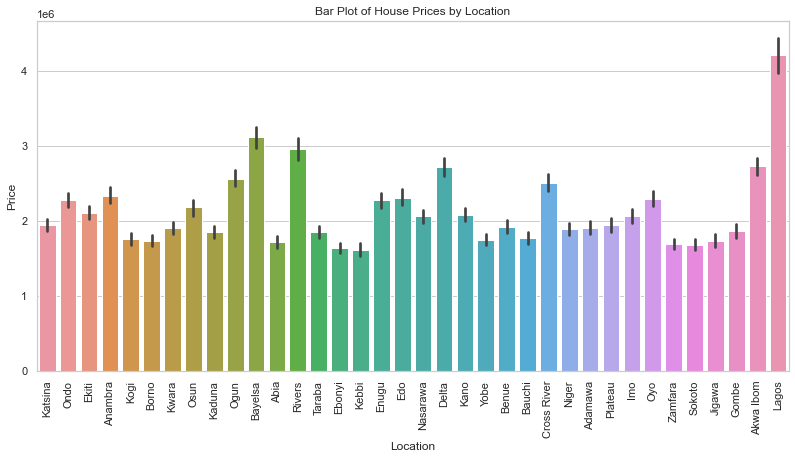

In [132]:
#House Price vs Location
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Bar Plot of House Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()


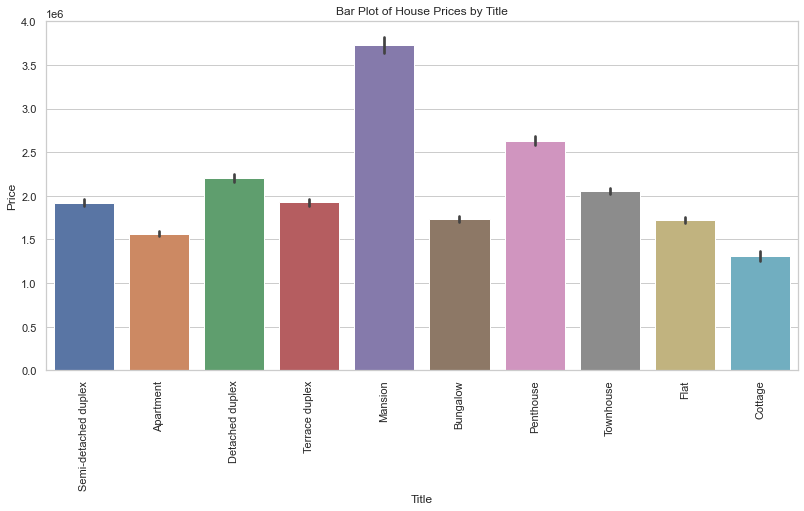

In [133]:
#House Price vs title
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Bar Plot of House Prices by Title')
plt.xlabel('Title')
plt.ylabel('Price')
plt.show()



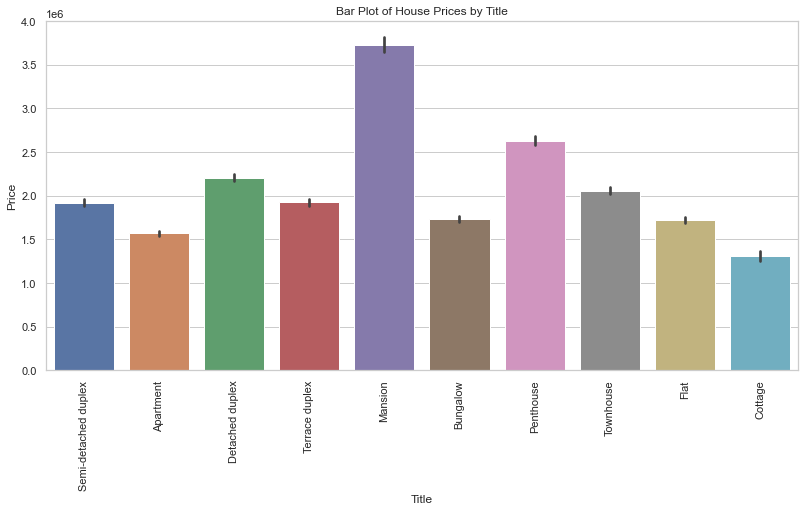

In [134]:
#House Price vs title
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Bar Plot of House Prices by Title')
plt.xlabel('Title')
plt.ylabel('Price')
plt.show()



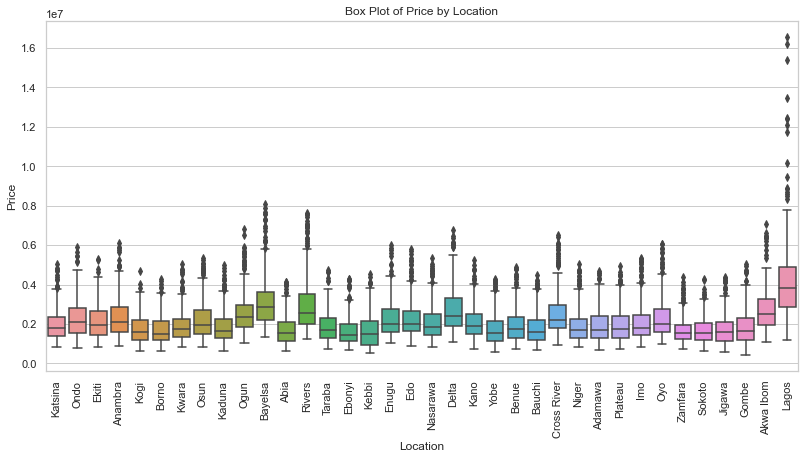

In [135]:
#Box plot of House price vs Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='loc', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Box Plot of Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

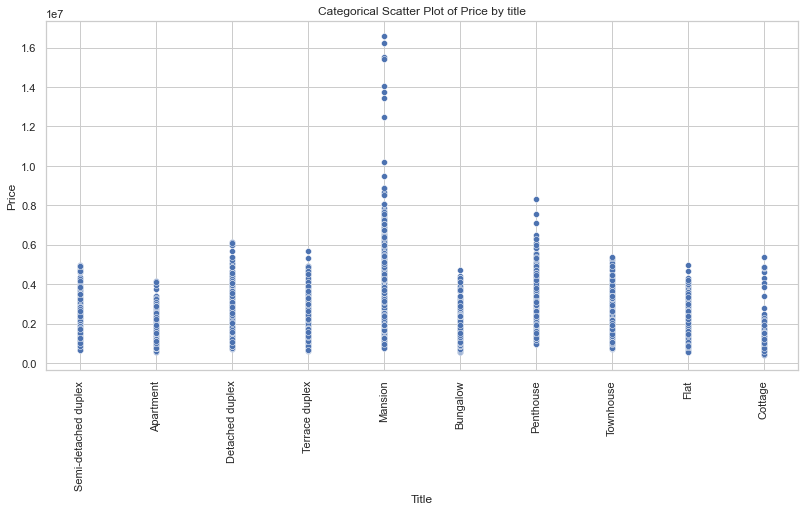

In [136]:
#Scatte plof of House price vs Title
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Categorical Scatter Plot of Price by title')
plt.xlabel('Title')
plt.ylabel('Price')
plt.show()


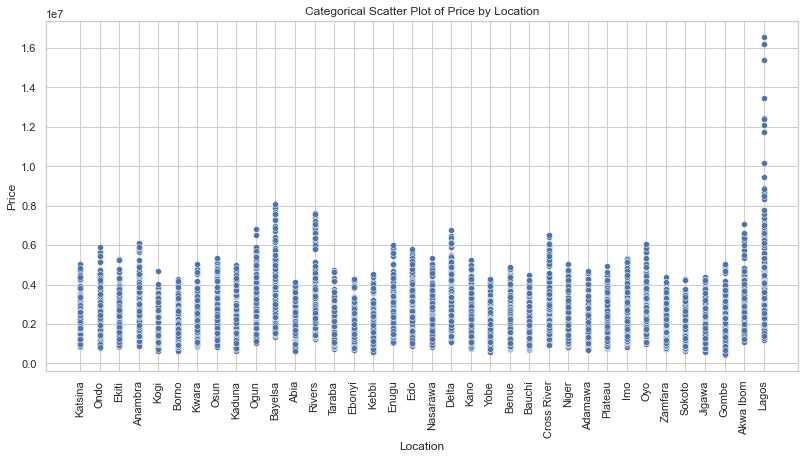

In [137]:
#Scatter plot of House price vs Location
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loc', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Categorical Scatter Plot of Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

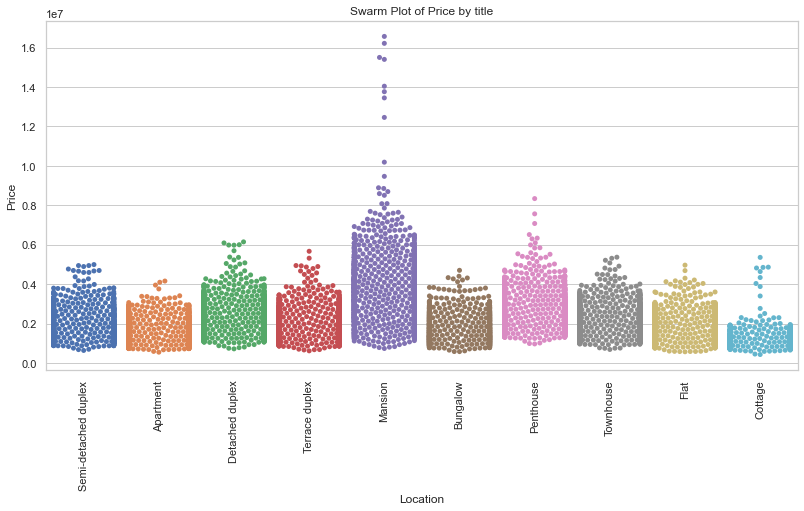

In [139]:
#Swarmplot of House price vs Title
plt.figure(figsize=(12, 6))
sns.swarmplot(x='title', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Swarm Plot of Price by title')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

### Visualizing the Numerical features

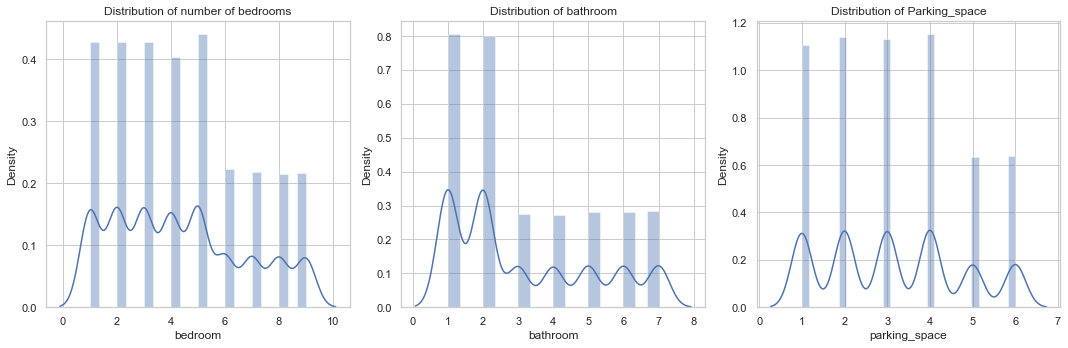

In [140]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distplot for bedroom
sns.distplot(train['bedroom'], ax=axes[0])
axes[0].set_title('Distribution of number of bedrooms')
axes[0].set_xlabel('bedroom')
axes[0].set_ylabel('Density')

# Distplot for bathroom
sns.distplot(train['bathroom'], ax=axes[1])
axes[1].set_title('Distribution of bathroom')
axes[1].set_xlabel('bathroom')
axes[1].set_ylabel('Density')

# Distplot for parking_space
sns.distplot(train['parking_space'], ax=axes[2])
axes[2].set_title('Distribution of Parking_space')
axes[2].set_xlabel('parking_space')
axes[2].set_ylabel('Density')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

### Comparing Numerical features with price

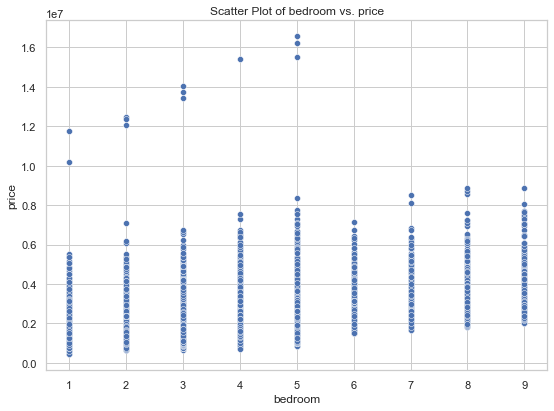

In [141]:
#Scatterplot of Price vs bedroom
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedroom', y='price', data=train)
plt.title('Scatter Plot of bedroom vs. price')
plt.xlabel('bedroom')
plt.ylabel('price')
plt.show()

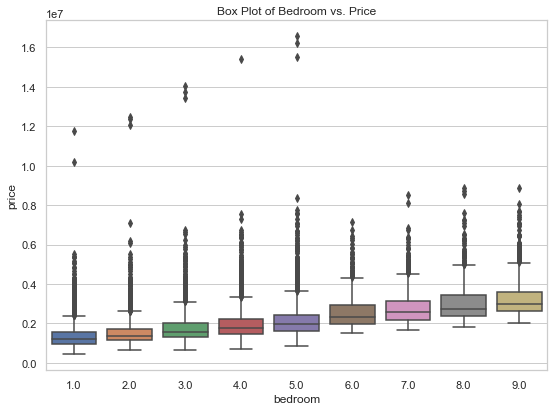

In [142]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedroom', y='price', data=train)
plt.title('Box Plot of Bedroom vs. Price')
plt.show()

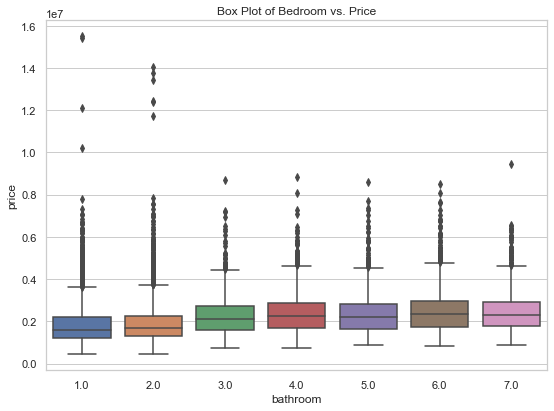

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathroom', y='price', data=train)
plt.title('Box Plot of Bedroom vs. Price')
plt.show()

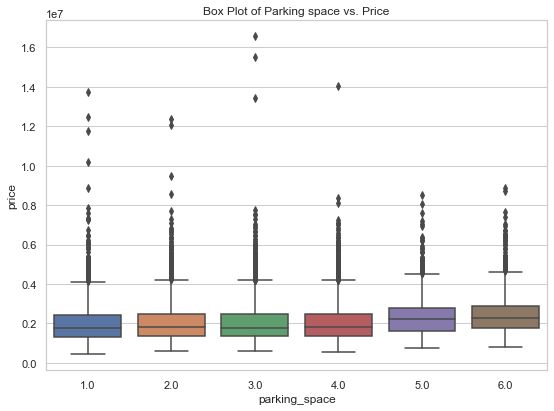

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='parking_space', y='price', data=train)
plt.title('Box Plot of Parking space vs. Price')
plt.show()

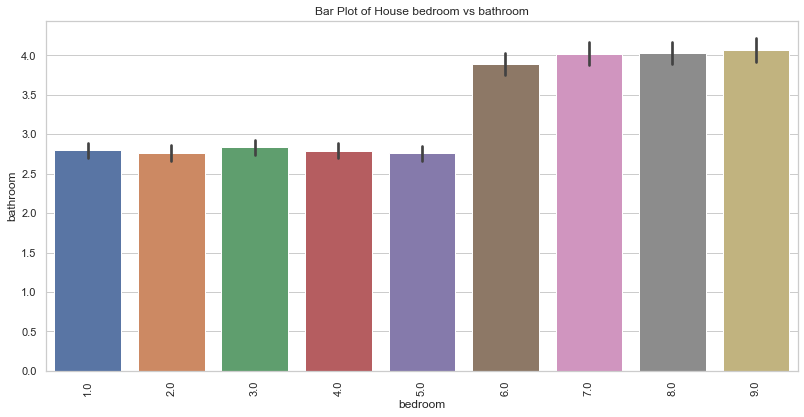

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bedroom', y='bathroom', data=train)
plt.xticks(rotation=90)
plt.title('Bar Plot of House bedroom vs bathroom')
plt.xlabel('bedroom')
plt.ylabel('bathroom')
plt.show()

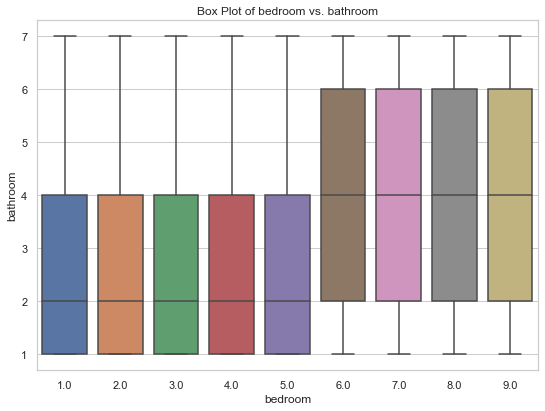

In [146]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedroom', y='bathroom', data=train)
plt.title('Box Plot of bedroom vs. bathroom')
plt.show()

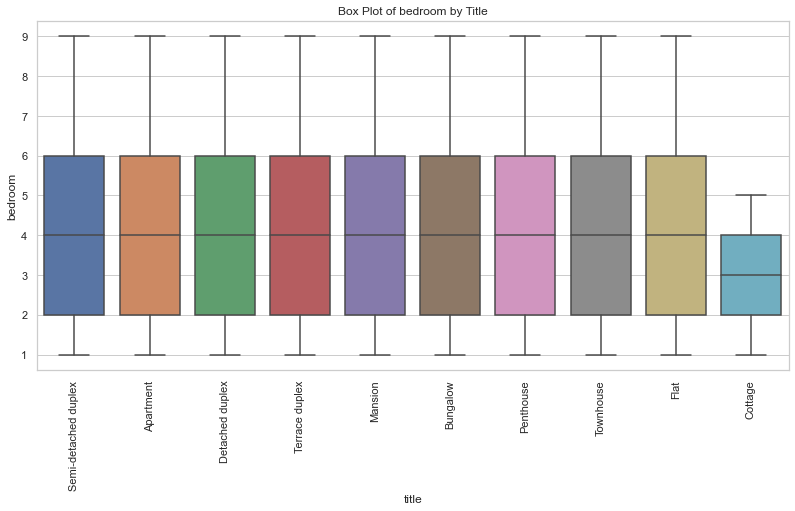

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='title', y='bedroom', data=train)
plt.xticks(rotation=90)
plt.title('Box Plot of bedroom by Title')
plt.xlabel('title')
plt.ylabel('bedroom')
plt.show()

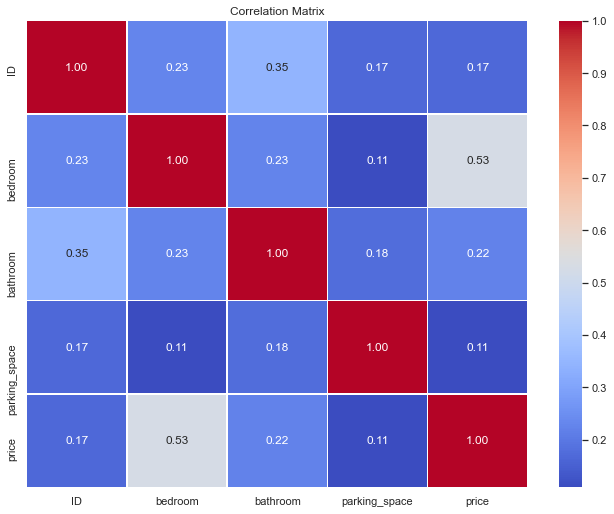

In [148]:
correlation_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Insights from EDA

### 1. Missing Values:

Each feature in the dataset has a similar number of missing values, and there are some instances where multiple missing values occur across a row.

### 2. Location Analysis:

The count plot for the 'loc' feature reveals minimal variation in the number of houses for each state present in the dataset. Kaduna appears to have the highest number of houses, but the dataset is evenly distributed across the states. This observation holds true for the 'title' feature as well.

### 3. Price vs. Location:

A bar plot comparing house prices across different locations shows that houses in Lagos are the most expensive, followed by Bayelsa, Rivers, and Delta. Conversely, house prices are the most affordable in Ebonyi and Kebbi.

### 4. Price vs. House Titles:

Mansions are the most expensive house titles, while cottages are the least expensive.

### 5. Outliers and Price Trends:

Mansions exhibit the most outliers, with prices showing an upward trend.
House prices show an increase as the number of bedrooms increases, with 5-bedroom houses having the highest price variation. The most expensive houses typically have 5 bedrooms.
Houses with more bathrooms tend to be expensive, but the variation in prices is not very strong.

### 6. Bedroom and Bathroom Distribution:

The distribution plots for bedrooms and bathrooms are both skewed. Most houses have between 1 and 2 bathrooms and 1 to 5 bedrooms.

### 7. Price Distribution:

The distribution of the target variable (house pricing) is right-skewed, indicating that higher-priced houses are less common.

### 8. Parking Spaces:

The number of parking spaces for houses mostly ranges from 1 to 4.

### 9. Correlation:

No strong correlations are observed among the features, suggesting that they are relatively independent of each other.

### separating price column from the rest of the dataframe

In [150]:
y = train['price']
train = train.drop(columns=['price'])

In [151]:
train.shape

(14000, 6)

In [152]:
test.shape

(6000, 6)

In [153]:
combined_df = pd.concat([train, test], axis=0, ignore_index=True)

In [88]:
combined_df

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0
...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0
19997,10195,Oyo,Townhouse,4.0,1.0,4.0
19998,9455,Bauchi,Flat,3.0,7.0,5.0


In [154]:
train = combined_df

In [155]:
train

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0
...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0
19997,10195,Oyo,Townhouse,4.0,1.0,4.0
19998,9455,Bauchi,Flat,3.0,7.0,5.0


## Handling Missing Values

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20000 non-null  int64  
 1   loc            18187 non-null  object 
 2   title          18278 non-null  object 
 3   bedroom        18201 non-null  float64
 4   bathroom       18195 non-null  float64
 5   parking_space  18189 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 937.6+ KB


In [157]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
dtype: int64

In [158]:
#Lets continue with filling the NaNs in title and location as a new category

train['title'].fillna('New', inplace=True)

train['loc'].fillna('State', inplace=True)

In [159]:
#Let's fill the missing bedroom values using the median bedroom number of each house title

unique_title = train['title'].value_counts().index
for i in unique_title:
    median_bedroom_per_title = train[train['title'] == i]['bedroom'].median()
    train.loc[train['title'] == i, 'bedroom'] = train.loc[train['title'] == i, 'bedroom'].fillna(median_bedroom_per_title)

In [160]:
#Creating a loop that calculates the median number of bathrooms for each number of bedrooms and fills the missing bathroom values in that number of bathroom with it
#e.g for 1 bedroom houses, calculate the median number of bathrooms in houses with 1 bedroom
#Fill the missing bathroom values in houses with 1 bedroom with that median number

max_bedroom = train.bedroom.max()

for i in range (1, int(max_bedroom + 1)):
    median_bathrooms_per_bedroom = train[train['bedroom'] == i]['bathroom'].median()
    #print(f"for {i} number of bathrooms, the median is {median_bathrooms_per_bedroom}")
    
    
    train.loc[train['bedroom'] == i, 'bathroom'] = train.loc[train['bedroom'] == i, 'bathroom'].fillna(median_bathrooms_per_bedroom)

### Preparing Data for modelling

In [162]:
# Perform one-hot encoding
train_encoded = pd.get_dummies(train, columns=['loc', 'title'])

In [163]:
X = train_encoded.drop(columns=['ID'])

## Feature Engineering

In [164]:
X['total_rooms'] = X['bedroom'] + X['bathroom']
X['bath/bed'] = X['bathroom'] / X['bedroom']

In [165]:
X

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
0,2.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,1.000000
1,4.0,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.0,0.500000
2,7.0,5.0,NaN,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,12.0,0.714286
3,5.0,2.0,4.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,7.0,0.400000
4,4.0,5.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.0,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9.0,1.250000
19996,5.0,7.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,1.400000
19997,4.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0.250000
19998,3.0,7.0,5.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,10.0,2.333333


## Model Building

In [166]:
X_train_data = X[0:14000]

In [167]:
X_train_data

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
0,2.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,1.000000
1,4.0,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.0,0.500000
2,7.0,5.0,NaN,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,12.0,0.714286
3,5.0,2.0,4.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,7.0,0.400000
4,4.0,5.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.0,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,4.0,7.0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.0,1.750000
13996,4.0,7.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.0,1.750000
13997,8.0,6.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14.0,0.750000
13998,4.0,6.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.0,1.500000


In [195]:
x_test_data = X[14000:]

In [196]:
x_test_data

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
14000,4.0,1.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,0.250000
14001,2.0,2.0,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1.000000
14002,2.0,7.0,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9.0,3.500000
14003,9.0,5.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,14.0,0.555556
14004,5.0,6.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.0,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9.0,1.250000
19996,5.0,7.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,1.400000
19997,4.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0.250000
19998,3.0,7.0,5.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,10.0,2.333333


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y, test_size=0.2, random_state=42)

### Building a CatboostRegressor Model

In [171]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [189]:
model_1 = CatBoostRegressor(loss_function='RMSE', 
                          iterations=40000, 
                          learning_rate=0.001,
                          depth=4,
                          l2_leaf_reg=1, 
                          random_state=42)

In [190]:
# Fit the model on the training data
model_1.fit(X_train, y_train, verbose=5000)

0:	learn: 1072692.2435386	total: 8.86ms	remaining: 5m 54s
5000:	learn: 580797.1911000	total: 25.6s	remaining: 2m 59s
10000:	learn: 537271.2218478	total: 52.9s	remaining: 2m 38s
15000:	learn: 517867.0317777	total: 1m 20s	remaining: 2m 13s
20000:	learn: 507522.4098642	total: 1m 53s	remaining: 1m 53s
25000:	learn: 500082.8242646	total: 2m 22s	remaining: 1m 25s
30000:	learn: 493494.7101779	total: 2m 53s	remaining: 57.8s
35000:	learn: 487562.9269953	total: 3m 22s	remaining: 28.9s
39999:	learn: 482429.6478727	total: 3m 50s	remaining: 0us


In [191]:
# Make predictions on the test data
y_pred = model_1.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 584613.916695594


In [197]:
# Make predictions on the test data
catboost_pred  = model_1.predict(x_test_data)

In [185]:
n_test = pd.read_csv("D:/Browser Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv")
submission = pd.DataFrame()
submission['ID'] = n_test['ID']
submission['price'] = catboost_pred
submission.to_csv('4.csv', index=False)
submission

,ID,price
0,845,2207883.250
1,1924,1018582.250
2,10718,1230748.750
3,12076,8917022.000
4,12254,1896093.250
...,...,...
5995,1594,1683491.375
5996,2416,1922346.125
5997,10195,1889948.500
5998,9455,1338178.125


In [173]:
! pip install xgboost

### Building a Xgboost Model

In [198]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an XGBoost DMatrix for efficient data handling
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression problem using squared loss
    'eval_metric': 'rmse',            # Evaluation metric: Root Mean Squared Error
    'eta': 0.2,                       # Learning rate (step size for each iteration) 0.01
    'max_depth': 3,                   # Maximum depth of each tree
    'min_child_weight': 5,            # Minimum sum of instance weight (Hessian) needed in a child
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 1.0,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.7,          # Subsample ratio of features when constructing each tree
    'seed': 42                        # Random seed for reproducibility
}


In [199]:
# Train the XGBoost model
num_rounds = 500  # Number of boosting rounds (iterations)
model_2 = xgb.train(params, dtrain, num_rounds)


In [200]:
# Make predictions on the test set
y_pred = model_2.predict(dtest)

In [201]:
# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 577179.8808301761


In [202]:
x_test_data = xgb.DMatrix(x_test_data)


In [203]:
# Make predictions on the test data
xgb_pred = model_2.predict(x_test_data)

In [204]:
n_test = pd.read_csv("D:/Browser Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv")

## Combining both Catboost and Xgboost

In [205]:
submission = pd.DataFrame()
submission['ID'] = n_test['ID']
submission['price'] = (catboost_pred *3/5) + (xgb_pred*2/5) #blending the two models and giving catboost more weight

In [206]:
submission.to_csv('final_pred2.csv', index=False)

## Hyperparameter Tuning

In [121]:
#from catboost import CatBoostRegressor
#from sklearn.model_selection import GridSearchCV

# Create a CatBoostRegressor object
catboost_model = CatBoostRegressor(verbose=10000)

# Define the hyperparameter grid to search
#param_grid = {
    'iterations': [10000, 20000, 40000],           # Number of boosting iterations
    'learning_rate': [0.1, 0.01, 0.001],      # Learning rate for boosting
    'depth': [4, 6, 8],                      # Depth of the trees
    'l2_leaf_reg': [1, 3, 5]                 # L2 regularization term on leaf weights
}

# Initialize the GridSearchCV object with the CatBoost model and hyperparameter grid
#grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform the grid search on training data
#grid_search.fit(X_train_data, y)

# Print the best hyperparameters and corresponding RMSE
#print("Best Hyperparameters:", grid_search.best_params_)
#print("Best RMSE:", np.sqrt(-grid_search.best_score_))

0:	learn: 1019830.2789204	total: 5.08ms	remaining: 50.8s
9999:	learn: 298714.4246635	total: 23s	remaining: 0us
0:	learn: 1035287.3420946	total: 2.5ms	remaining: 25s
9999:	learn: 304964.0515870	total: 22.6s	remaining: 0us
0:	learn: 1026761.5564273	total: 2.57ms	remaining: 25.7s
9999:	learn: 312746.2346351	total: 22.4s	remaining: 0us
0:	learn: 1068494.5314263	total: 9.33ms	remaining: 1m 33s
9999:	learn: 441783.0005665	total: 22.8s	remaining: 0us
0:	learn: 1086940.0298488	total: 3.58ms	remaining: 35.8s
9999:	learn: 440947.0635469	total: 26.5s	remaining: 0us
0:	learn: 1076403.5263877	total: 2.54ms	remaining: 25.4s
9999:	learn: 447981.0693349	total: 25.5s	remaining: 0us
0:	learn: 1073481.9991330	total: 3.35ms	remaining: 33.5s
9999:	learn: 546317.6757534	total: 25.2s	remaining: 0us
0:	learn: 1092228.2471670	total: 2.39ms	remaining: 23.9s
9999:	learn: 544904.6747278	total: 25.1s	remaining: 0us
0:	learn: 1081488.2673602	total: 5.26ms	remaining: 52.6s
9999:	learn: 550123.1710717	total: 25.1s	re

In [ ]:
#Best Hyperparameters: {'depth': 4, 'iterations': 40000, 'l2_leaf_reg': 1, 'learning_rate': 0.001}
#Best RMSE: 537405.3463602962